## Project 2 - Ames Housing Data and Kaggle Challenge - Attempt 16

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
# Adrian provided code to me that displays all the columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

### Load, Review,  and Clean Data

In [3]:
# Read in the Ames train data into a dataframe
ames_df = pd.read_csv('../datasets/train.csv')

In [4]:
# Check the first few rows of data
ames_df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [5]:
# Check the null cell counts and datatypes of each column
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
# Check the % of null cells for each column
ames_df.isnull().mean().sort_values(ascending=False)

Pool QC            0.995612
Misc Feature       0.968308
Alley              0.931741
Fence              0.804973
Fireplace Qu       0.487567
Lot Frontage       0.160897
Garage Finish      0.055583
Garage Cond        0.055583
Garage Qual        0.055583
Garage Yr Blt      0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Bsmt Qual          0.026816
Mas Vnr Type       0.010726
Mas Vnr Area       0.010726
Bsmt Half Bath     0.000975
Bsmt Full Bath     0.000975
Garage Cars        0.000488
Garage Area        0.000488
Bsmt Unf SF        0.000488
BsmtFin SF 2       0.000488
Total Bsmt SF      0.000488
BsmtFin SF 1       0.000488
Overall Cond       0.000000
Exterior 2nd       0.000000
Exterior 1st       0.000000
Roof Matl          0.000000
Roof Style         0.000000
Year Remod/Add     0.000000
Year Built         0.000000
SalePrice          0.000000
Overall Qual       0.000000
Land Contour       0

In [7]:
# Fill the null cells with 0 as a placeholder
[ames_df[c].fillna(0, inplace=True) for c in ames_df]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
# Take a look at the data statistics
round(ames_df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.0,844.0,1.0,754.0,1486.0,2198.0,2930.0
PID,2051.0,713590006.0,188691838.0,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,57.0,43.0,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,58.0,33.0,0.0,44.0,63.0,78.0,313.0
Lot Area,2051.0,10065.0,6742.0,1300.0,7500.0,9430.0,11514.0,159000.0
Overall Qual,2051.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1972.0,30.0,1872.0,1954.0,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.0,21.0,1950.0,1964.0,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,99.0,174.0,0.0,0.0,0.0,159.0,1600.0


### Create New Columns for Features

In [9]:
# Create a new column for the log of SalePrice based on Adrian's suggestion. Have to use .exp for the predictions
with_dummies = ames_df
with_dummies['SalePrice_log'] = np.log(with_dummies['SalePrice'])

In [10]:
# Create a new column for the total number of baths in the listing
with_dummies['total_baths'] = with_dummies['Bsmt Full Bath'] + \
                              with_dummies['Bsmt Half Bath']/2 +\
                              with_dummies['Full Bath'] + \
                              with_dummies['Half Bath']/2

In [11]:
# Create a new column for the total square feet of outdoor living space
with_dummies['total_out'] = with_dummies['Wood Deck SF'] + \
                            with_dummies['Open Porch SF'] + \
                            with_dummies['Enclosed Porch'] + \
                            with_dummies['3Ssn Porch'] + \
                            with_dummies['Screen Porch']

In [12]:
# Create a new column for common rooms
with_dummies['common_room'] = with_dummies['TotRms AbvGrd'] - \
                             (with_dummies['Kitchen AbvGr'] + with_dummies['Bedroom AbvGr'])

In [13]:
# Create a new column for 'street'
with_dummies['street_paved'] = with_dummies['Street'].replace(to_replace=('Pave', 'Grvl'), value=(1, 0))

In [14]:
# Create a new column for 'central_air_y'
with_dummies['central_air_y'] = with_dummies['Central Air'].replace(to_replace=('Y', 'N'), value=(1, 0))

### Create Plots to Review Features

In [15]:
# Brandon Spiegal gave me the idea about swarmplots

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Street']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Land Slope'], order=['Gtl', 'Mod', 'Sev']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Land Contour']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Bldg Type']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['MS SubClass']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Heating QC'], order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Central Air']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Kitchen Qual'], 
              order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Functional']);

sns.pairplot(with_dummies, y_vars=['SalePrice_log'], x_vars=['Overall Qual', 
                                                             'Gr Liv Area', 
                                                             'Garage Cars', 
                                                             'total_baths', 
                                                             'Year Remod/Add', 
                                                             'Total Bsmt SF',
                                                             'common_room', 
                                                             'Fireplaces', 
                                                             'total_out', 
                                                             'Lot Area']);

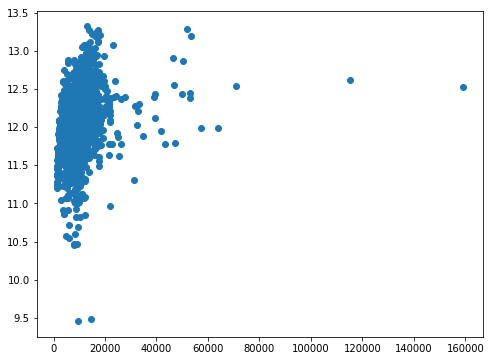

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(with_dummies['Lot Area'], with_dummies['SalePrice_log']);

### Create Dummies

In [17]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
with_dummies = pd.get_dummies(ames_df, columns=['MS Zoning', 
                                                'Neighborhood', 
                                                'Land Contour', 
                                                'MS SubClass', 
                                                'Functional'], drop_first=True)
with_dummies.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
Lot Frontage,0,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,0,0,0,0,0
Lot Shape,IR1,IR1,Reg,Reg,IR1
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,CulDSac,CulDSac,Inside,Inside,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl


### Log Transformations

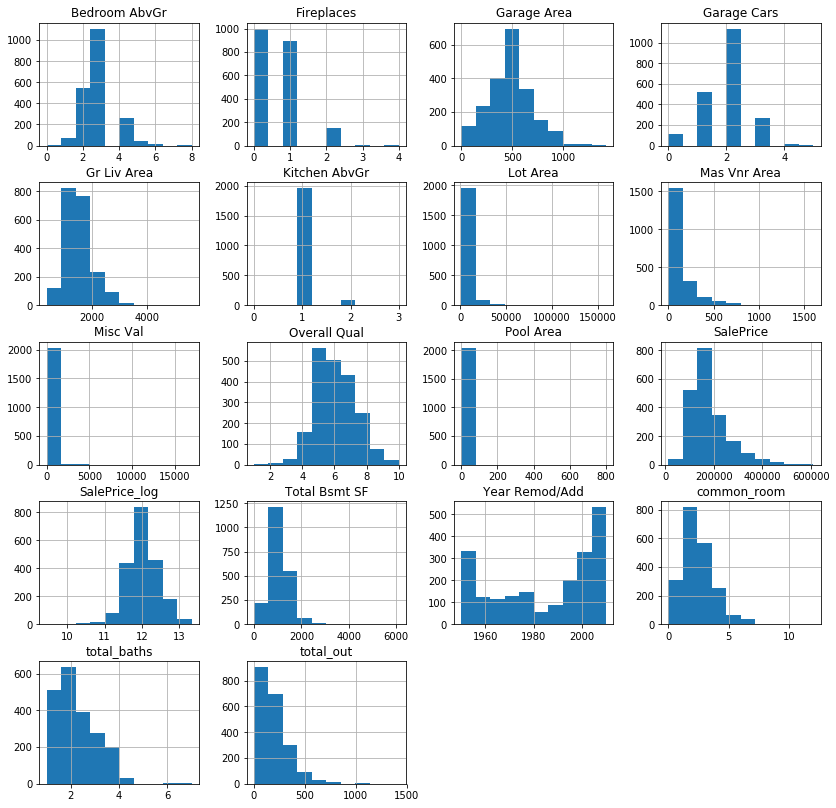

In [18]:
# I want to check my features that are numeric (not dummy columns) to see if any of them could be log transformed
features_2 = ['Overall Qual', 
              'Gr Liv Area', 
              'Garage Cars', 
              'Garage Area',
              'total_baths', 
              'Year Remod/Add', 
              'Total Bsmt SF',
              'common_room', 
              'total_out', 
              'Lot Area', 
              'Fireplaces',
              'Pool Area',
              'Bedroom AbvGr',
              'Kitchen AbvGr',
              'Misc Val',
              'Mas Vnr Area',
              'SalePrice', 
              'SalePrice_log'
             ]
with_dummies[features_2].hist(figsize=(14,14));

After reviewing the features' histograms the following list contains distributions that are skewed to the right:
- 'Gr Liv Area' 
- 'total_baths' 
- 'Total Bsmt SF'
- 'common_room' 
- 'total_out' 
- 'Lot Area' 
- 'Mas Vnr Area'
- 'Fireplaces'

Will run a log transformation on them to see if it will make the distribution normal.

In [19]:
# Create new columns with potential log values
with_dummies['Gr Liv Area_log'] = np.log(with_dummies['Gr Liv Area']+1)
with_dummies['total_out_log'] = np.log(with_dummies['total_out']+1)
with_dummies['total_baths_log'] = np.log(with_dummies['total_baths']+1)
with_dummies['common_room_log'] = np.log(with_dummies['common_room']+1)
with_dummies['Total Bsmt SF_log'] = np.log(with_dummies['Total Bsmt SF']+1)
with_dummies['Lot Area_log'] = np.log(with_dummies['Lot Area']+1)
with_dummies['Mas Vnr Area_log'] = np.log(with_dummies['Mas Vnr Area']+1)
with_dummies['Fireplaces_log'] = np.log(with_dummies['Fireplaces']+1)


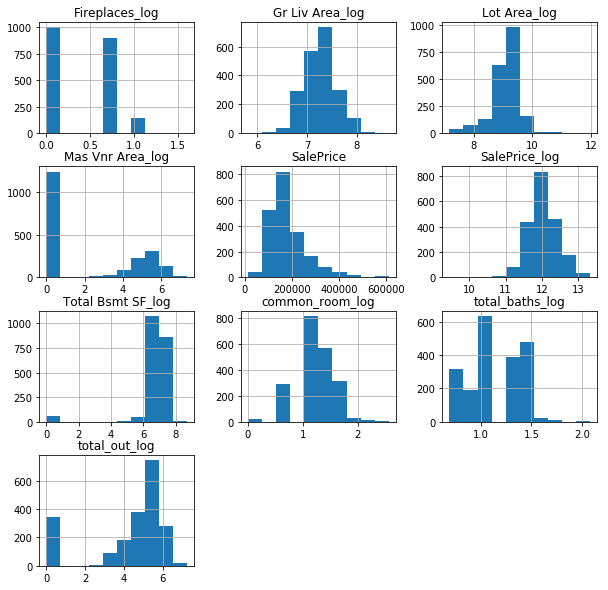

In [20]:
# I want to check my log transformed features 
features_3 = ['Gr Liv Area_log', 
              'total_baths_log', 
              'Total Bsmt SF_log',
              'common_room_log', 
              'total_out_log', 
              'Lot Area_log', 
              'Mas Vnr Area_log',
              'Fireplaces_log',
              'SalePrice', 
              'SalePrice_log']
with_dummies[features_3].hist(figsize=(10,10));

After running a selection of features through the log transformation, the features that measured area looked more normally distributed:
- 'Gr Liv Area_log'
- 'Total Bsmt SF_log'
- 'Mas Vnr Area_log'
- 'Lot Area_log' 
- 'total_out_log'

I will use these log transformed features in the place of their counterparts.

### Check Correlations of Features to Sale Price

In [21]:
# Calculate the correlation of the different columns to SalePrice_log
with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)

,SalePrice_log
SalePrice_log,1.000000
SalePrice,0.946134
Overall Qual,0.822774
Gr Liv Area_log,0.721359
Gr Liv Area,0.687774
total_baths_log,0.667394
Garage Cars,0.667168
total_baths,0.659341
Garage Area,0.650243
Year Built,0.624449


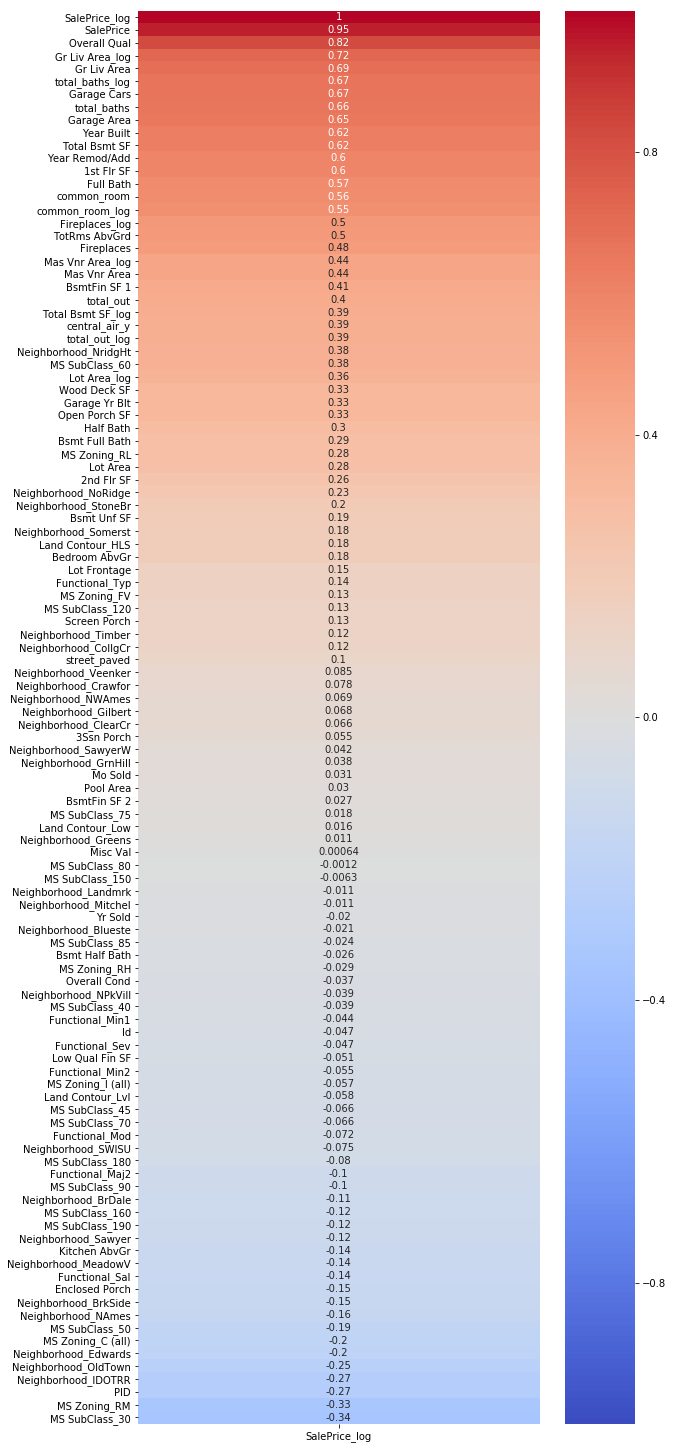

In [22]:
# Generate a heatmap of the correlation of the different columns to SalePrice_log
plt.figure(figsize = (9, 26))
sns.heatmap(with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending=False), annot=True, 
            cmap='coolwarm', vmin=-1);

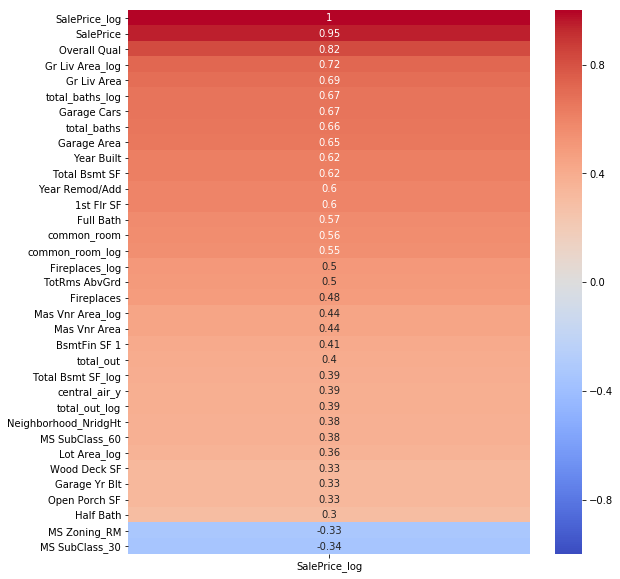

In [23]:
# Create a heatmap with a subset of columns that have greater than 0.3 or less than -0.3 correlation
# so that the heatmap isn't so crowded.

corr_sub = with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)
plt.figure(figsize = (9, 10))
sns.heatmap(corr_sub[(corr_sub['SalePrice_log'] > .3) | (corr_sub['SalePrice_log'] < -.3)], annot=True, 
            cmap='coolwarm', vmin=-1);

### Feature Selection

In [24]:
# Pick the features I think will generate a good model for predictions
features = [
            'Overall Qual', 
            'Gr Liv Area_log', 
            'Garage Cars', 
            'total_baths', 
            'Year Remod/Add', 
            'Total Bsmt SF_log',
            'common_room', 
            'total_out_log', 
            'Lot Area_log', 
            'Fireplaces',
            'Pool Area',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'Misc Val',
            'Mas Vnr Area_log',
            'MS Zoning_C (all)', 
            'MS Zoning_FV', 
            'MS Zoning_I (all)', 
            'MS Zoning_RH', 
            'MS Zoning_RL', 
            'MS Zoning_RM', 
            'street_paved',
            'central_air_y',
            'Neighborhood_Blueste', 
            'Neighborhood_BrDale', 
            'Neighborhood_BrkSide', 
            'Neighborhood_ClearCr', 
            'Neighborhood_CollgCr',
            'Neighborhood_Crawfor', 
            'Neighborhood_Edwards', 
            'Neighborhood_Gilbert', 
            'Neighborhood_Greens',
            'Neighborhood_GrnHill', 
            'Neighborhood_IDOTRR', 
            'Neighborhood_Landmrk', 
            'Neighborhood_MeadowV',
            'Neighborhood_Mitchel', 
            'Neighborhood_NAmes', 
            'Neighborhood_NPkVill', 
            'Neighborhood_NWAmes',
            'Neighborhood_NoRidge', 
            'Neighborhood_NridgHt', 
            'Neighborhood_OldTown', 
            'Neighborhood_SWISU',
            'Neighborhood_Sawyer', 
            'Neighborhood_SawyerW', 
            'Neighborhood_Somerst', 
            'Neighborhood_StoneBr',
            'Neighborhood_Timber', 
            'Neighborhood_Veenker',
            'Land Contour_HLS',
            'Land Contour_Low',
            'Land Contour_Lvl',
            'MS SubClass_30',
            'MS SubClass_40',
            'MS SubClass_45',
            'MS SubClass_50',
            'MS SubClass_60',
            'MS SubClass_70',
            'MS SubClass_75',
            'MS SubClass_80',
            'MS SubClass_85',
            'MS SubClass_90',
            'MS SubClass_120',
            'MS SubClass_150',
            'MS SubClass_160',
            'MS SubClass_180',
            'MS SubClass_190',
            'Functional_Maj2',
            'Functional_Min1',
            'Functional_Min2',
            'Functional_Mod',
            'Functional_Sal',
            'Functional_Sev',
            'Functional_Typ'
            ]

### Create Model

In [25]:
# Create X and y
X = with_dummies[features]
y = with_dummies['SalePrice_log']

# Train/test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

# Scale the data
ss = StandardScaler()
ss.fit(X_train) 
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) 

In [26]:
# Instantiate 3 models
lr = LinearRegression()
lasso = LassoCV(cv=5, max_iter=5000)
ridge = RidgeCV()

In [27]:
# Check the score of the three models
print(f'Linear Regression: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
print(f'Lasso: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
print(f'Ridge: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')

Linear Regression: -2.436930442445805e+21
Lasso: 0.8766397500907089
Ridge: 0.8753740160224514


In [28]:
# lasso appears to be the best model. Fit the lasso model
lasso.fit(X_train_sc, y_train)

# Score the model
lasso.score(X_train_sc, y_train)

0.8990327426330768

In [29]:
# Score the model with test data
lasso.score(X_test_sc, y_test)

0.8879964435915689

In [30]:
# Since the train and test scores are fairly close, bias and variance appear to be at the optimal range

In [31]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8766397500907089

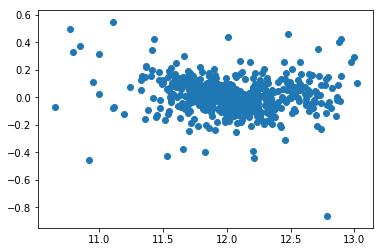

In [32]:
# Plot the predictions against the residuals to check for heteroscedasticity 
pred = lasso.predict(X_test_sc)
residuals = y_test - pred
plt.scatter(pred, residuals);

In [33]:
residuals.sort_values()

125    -0.863663
1292   -0.455259
156    -0.440552
834    -0.427204
197    -0.396766
9      -0.392959
1714   -0.376875
1613   -0.309675
764    -0.252494
258    -0.242259
784    -0.235627
1566   -0.233791
1135   -0.223735
913    -0.212957
1415   -0.210286
1318   -0.209668
1605   -0.206330
990    -0.202296
751    -0.199661
1673   -0.194281
1965   -0.190344
1325   -0.187676
1419   -0.183578
1438   -0.182284
939    -0.179463
1079   -0.179447
881    -0.176493
1803   -0.176162
1115   -0.173899
482    -0.172089
1991   -0.171259
1252   -0.167466
1041   -0.161195
689    -0.160175
487    -0.159395
1077   -0.158112
2009   -0.148068
1668   -0.144452
127    -0.143254
1585   -0.140768
635    -0.140087
1202   -0.139548
1791   -0.139416
1608   -0.139397
1101   -0.138908
1623   -0.138411
1737   -0.135375
1494   -0.134451
1038   -0.131667
1261   -0.130085
2042   -0.130031
1565   -0.129950
224    -0.129287
646    -0.128550
1764   -0.124962
641    -0.124331
1180   -0.120046
56     -0.119491
970    -0.1183

In [34]:
# The plots look evenly distributed, with a few outliers. Doesn't appear to be a pattern, so homoscedastic.

In [35]:
# Calculate the root mean squared
rss = (residuals ** 2).sum()
np.sqrt(rss/ len(pred))

0.13308603027797866

In [36]:
# Fit the model on the entire dataset
# Scale the data
ss = StandardScaler()
ss.fit(X) 
X_sc = ss.transform(X)

# Fit the model
lasso.fit(X_sc, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

### Process the Test Data for Predictions

In [37]:
# Read in the Ames test data into a dataframe
ames_test = pd.read_csv('../datasets/test.csv')

In [38]:
# Check the first few rows of data
ames_test.head().T

,0,1,2,3,4
Id,2658,2718,2414,1989,625
PID,902301120,905108090,528218130,902207150,535105100
MS SubClass,190,90,60,30,20
MS Zoning,RM,RL,RL,RM,RL
Lot Frontage,69,NaN,58,60,NaN
Lot Area,9142,9662,17104,8520,9500
Street,Pave,Pave,Pave,Pave,Pave
Alley,Grvl,NaN,NaN,NaN,NaN
Lot Shape,Reg,IR1,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [39]:
# Fill the null cells with 0 as a placeholder
[ames_test[c].fillna(0, inplace=True) for c in ames_test]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [40]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
test_with_dummies = pd.get_dummies(ames_test, columns=['MS Zoning', 
                                                       'Neighborhood', 
                                                       'Land Contour', 
                                                       'MS SubClass', 
                                                       'Functional'], drop_first=True)

In [41]:
# Create a new column for the total number of baths in the listing
test_with_dummies['total_baths'] = test_with_dummies['Bsmt Full Bath'] + \
                                   test_with_dummies['Bsmt Half Bath']/2 +\
                                   test_with_dummies['Full Bath'] + \
                                   test_with_dummies['Half Bath']/2

In [42]:
# Create a new column for the total square feet of outdoor living space
test_with_dummies['total_out'] = test_with_dummies['Wood Deck SF'] + \
                                 test_with_dummies['Open Porch SF'] + \
                                 test_with_dummies['Enclosed Porch'] + \
                                 test_with_dummies['3Ssn Porch'] + \
                                 test_with_dummies['Screen Porch']

In [43]:
# Create a new column for common rooms
test_with_dummies['common_room'] = test_with_dummies['TotRms AbvGrd'] - \
                             (test_with_dummies['Kitchen AbvGr'] + test_with_dummies['Bedroom AbvGr'])

In [44]:
# Create a new column for 'street'
test_with_dummies['street_paved'] = test_with_dummies['Street'].replace(to_replace=('Pave', 'Grvl'), value=(1, 0))

In [45]:
# Create a new column for 'central_air_y'
test_with_dummies['central_air_y'] = test_with_dummies['Central Air'].replace(to_replace=('Y', 'N'), value=(1, 0))

In [46]:
# Create new columns with log values
test_with_dummies['Gr Liv Area_log'] = np.log(test_with_dummies['Gr Liv Area']+1)
test_with_dummies['total_out_log'] = np.log(test_with_dummies['total_out']+1)
test_with_dummies['Lot Area_log'] = np.log(test_with_dummies['Lot Area']+1)
test_with_dummies['Total Bsmt SF_log'] = np.log(test_with_dummies['Total Bsmt SF']+1)
test_with_dummies['Mas Vnr Area_log'] = np.log(test_with_dummies['Mas Vnr Area']+1)


In [47]:
# Add placeholder columns for features not found in Ames_test dataset
test_with_dummies['Neighborhood_GrnHill'] = 0
test_with_dummies['Neighborhood_Landmrk'] = 0
test_with_dummies['MS Zoning_C (all)'] = 0
test_with_dummies['MS SubClass_150'] = 0
test_with_dummies['Functional_Sal'] = 0
test_with_dummies['Functional_Sev'] = 0

In [48]:
# Create X for Ames_test
test_X = test_with_dummies[features]

# Scale the data
ss.fit(test_X) 
test_X_sc = ss.transform(test_X)

In [49]:
# Run the lasso model on the Ames_test data
test_with_dummies['SalePrice_log'] = lasso.predict(test_X_sc)

In [50]:
# Convert the 'SalesPrice_log' back to 'SalesPrice' by using .exp
test_with_dummies['SalePrice'] = np.exp(test_with_dummies['SalePrice_log'])

In [51]:
# Create new dataframe for the submission file
sub_df = pd.DataFrame(columns=['Id', 'SalePrice'])
sub_df['Id'] = test_with_dummies['Id']
sub_df['SalePrice'] = test_with_dummies['SalePrice']
sub_df

,Id,SalePrice
0,2658,120058.028846
1,2718,154252.414214
2,2414,211406.916578
3,1989,113574.719760
4,625,182481.421956
5,333,89266.548753
6,1327,111235.166606
7,858,144170.458857
8,95,186615.252751
9,1568,180671.401765


In [52]:
# Save the submission dataframe to a .csv file
sub_df.to_csv('../datasets/submission16_lasso.csv', index=False)

## Results
Generated a score of 25174.16106 in the Kaggle competition, which is worse than my 14th attempt. Started with same features as attempt 14. Added 'Mas Vnr Area' as features. Used log transform on features that measured area, and became more normally distributed: 'Gr Liv Area_log', 'Total Bsmt SF_log', 'total_out_log', 'Mas Vnr Area_log', and 'Lot Area_log'.
